# Outflow Forecasting

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from __future__ import print_function
sns.set()
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv('data_outflow.csv')

In [12]:
data.head()

,Year,Month,outflow,t,M1,M2,M3,M4,M5,M6,...,M11,M12,C1t,C2t,C3t,C4t,C1tm1,C2tm1,C3tm1,C4tm1
0,2003,1,8146.788100,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2003,2,8685.144800,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2003,3,9055.871675,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,4,9598.854950,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2003,5,12050.578450,5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(168, 24)

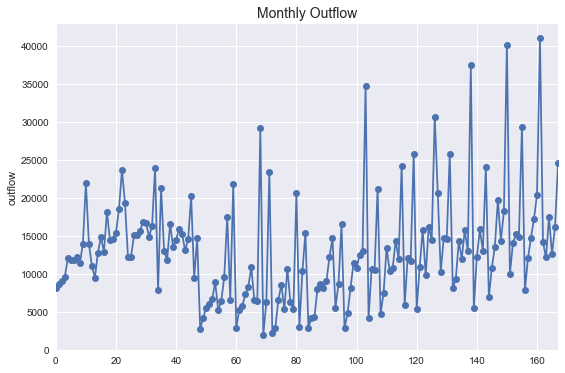

In [13]:
plt.subplots(nrows=1, ncols=1, figsize=(9,6))
sns.tsplot(data['outflow'], marker="o")
plt.title('Monthly Outflow', size=14)
plt.xlabel('')
plt.ylabel('outflow')
plt.show()

In [15]:
y = data['outflow']
X = data.drop(['Year', 'Month', 'outflow'], axis=1)

In [22]:
y_train = y[0:155]
y_test = y[155:]
X_train = X.iloc[0:155, :]
X_test = X.iloc[155:, :]

In [126]:
test_size = len(y_test)

In [10]:
from sklearn.linear_model import LinearRegression

In [23]:
modelReg = LinearRegression(fit_intercept=False)
modelReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [24]:
modelReg.score(X_test, y_test)

0.6000284668939553

In [25]:
y_predict = modelReg.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
mseTSReg = mean_squared_error(y_test, y_predict)

In [31]:
print(mseTSReg)

28702296.95210634


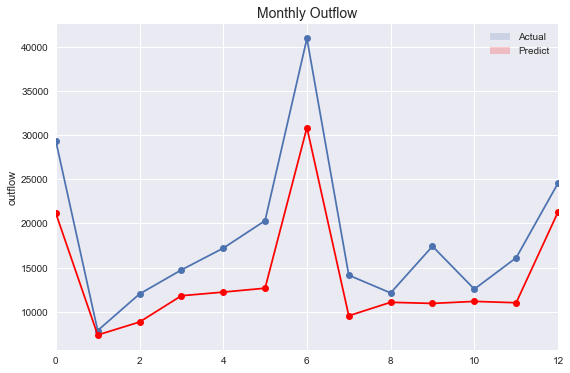

In [28]:
plt.subplots(nrows=1, ncols=1, figsize=(9,6))
sns.tsplot(y_test, marker="o")
sns.tsplot(y_predict, marker="o", color='r')
plt.legend(['Actual', 'Predict'])
plt.title('Monthly Outflow', size=14)
plt.xlabel('')
plt.ylabel('outflow')
plt.show()

## ARIMAX Model

In [32]:
train_error = y_train - modelReg.predict(X_train)

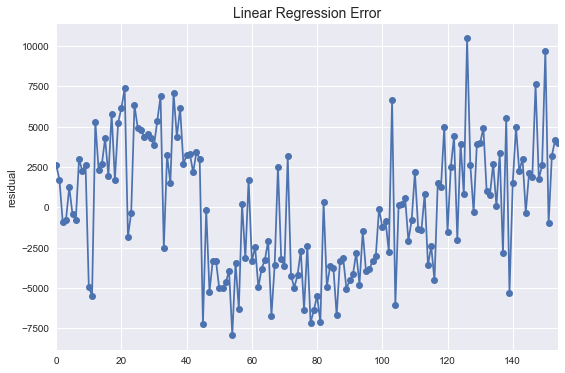

In [36]:
plt.subplots(nrows=1, ncols=1, figsize=(9,6))
sns.tsplot(train_error, marker="o")
plt.title('Linear Regression Error', size=14)
plt.xlabel('')
plt.ylabel('residual')
plt.show()

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

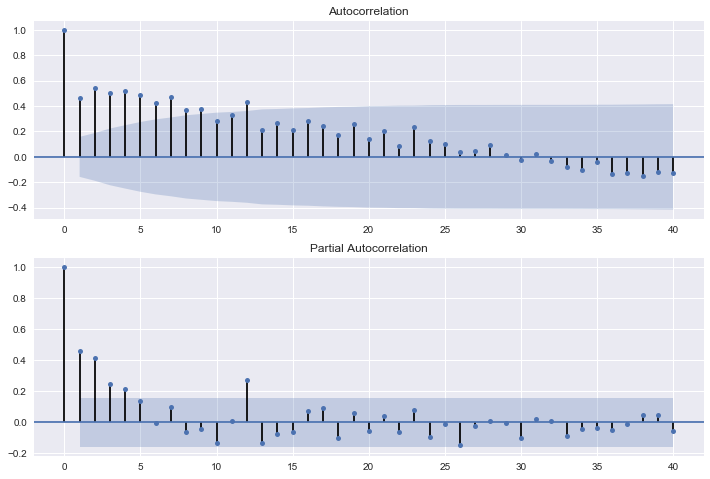

In [51]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(train_error, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(train_error, lags=40, ax=ax2)

In [47]:
train_error_diff = train_error.diff()

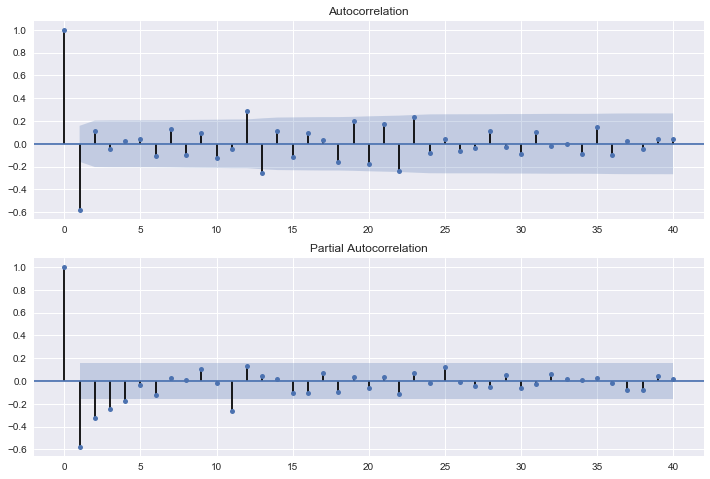

In [52]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(train_error_diff[1:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(train_error_diff[1:], lags=40, ax=ax2)

In [54]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from statsmodels.tsa.datetools.

In [63]:
model = ARIMA(np.array(train_error), order=(4,1,0))
model_fit = model.fit(trend='nc')

In [64]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  154
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -1454.789
Method:                       css-mle   S.D. of innovations           3055.330
Date:                Sat, 10 Mar 2018   AIC                           2919.577
Time:                        04:14:38   BIC                           2934.762
Sample:                             1   HQIC                          2925.745
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -0.8919      0.079    -11.247      0.000      -1.047      -0.736
ar.L2.D.y     -0.6120      0.102     -5.979      0.000      -0.813      -0.411
ar.L3.D.y     -0.4011      0.102     -3.923      0.0

In [127]:
arima_predict = model_fit.forecast(test_size)

In [128]:
arimax_predict = arima_predict[0] + y_predict

In [129]:
mseARIMAX = mean_squared_error(y_test, arimax_predict)

In [130]:
print(mseARIMAX)

8527066.428822953


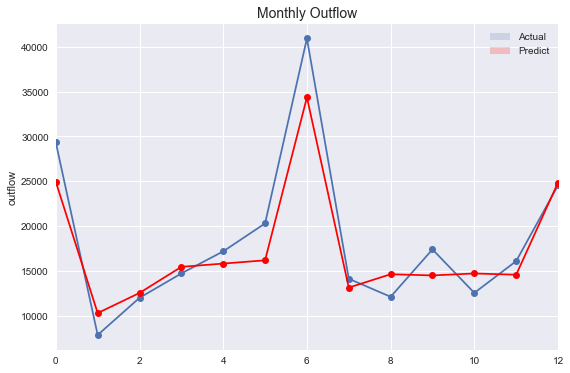

In [131]:
plt.subplots(nrows=1, ncols=1, figsize=(9,6))
sns.tsplot(y_test, marker="o")
sns.tsplot(arimax_predict, marker="o", color='r')
plt.legend(['Actual', 'Predict'])
plt.title('Monthly Outflow', size=14)
plt.xlabel('')
plt.ylabel('outflow')
plt.show()

## Feedforward Neural Network (FFNN)

In [174]:
from sklearn.neural_network import MLPRegressor
from statsmodels.tsa.tsatools import lagmat

In [175]:
ts = lagmat(train_error, 5, trim='both', original='in', use_pandas=True)

In [176]:
ts.head()

,outflow,outflow.L.1,outflow.L.2,outflow.L.3,outflow.L.4,outflow.L.5
5,-424.236025,1240.829989,-769.778946,-900.757378,1703.160582,2630.028122
6,-789.897324,-424.236025,1240.829989,-769.778946,-900.757378,1703.160582
7,2970.430254,-789.897324,-424.236025,1240.829989,-769.778946,-900.757378
8,2282.717787,2970.430254,-789.897324,-424.236025,1240.829989,-769.778946
9,2615.910305,2282.717787,2970.430254,-789.897324,-424.236025,1240.829989


In [177]:
ts.tail()

,outflow,outflow.L.1,outflow.L.2,outflow.L.3,outflow.L.4,outflow.L.5
150,9719.760495,2597.067251,1770.129377,7623.092893,1895.718885,2110.911471
151,-985.988107,9719.760495,2597.067251,1770.129377,7623.092893,1895.718885
152,3205.983696,-985.988107,9719.760495,2597.067251,1770.129377,7623.092893
153,4184.460443,3205.983696,-985.988107,9719.760495,2597.067251,1770.129377
154,3964.886552,4184.460443,3205.983696,-985.988107,9719.760495,2597.067251


In [313]:
NNmodel = MLPRegressor(hidden_layer_sizes=(300,), max_iter=500, activation='relu', random_state=123)

In [314]:
y_train_nn = np.array(ts['outflow'])
X_train_nn = ts.iloc[:,1:]

In [315]:
NNmodel.fit(X_train_nn, y_train_nn)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [316]:
y_predict_nn = np.concatenate((y_train_nn[:], np.zeros(test_size)))

In [317]:
nn_train_size = len(y_train_nn)

In [318]:
for i in range(nn_train_size, nn_train_size+test_size):
    X_test_nn = np.array([y_predict_nn[i-1], y_predict_nn[i-2], y_predict_nn[i-3], 
                          y_predict_nn[i-4], y_predict_nn[i-5]]).reshape(1,-1)
    y_predict_nn[i] = NNmodel.predict(X_test_nn)

In [319]:
y_predict_nn[-test_size:]

array([4826.72151668, 3132.42166747, 3837.91975233, 4033.05285576,
       3871.5476497 , 4089.70825183, 3771.12608045, 3914.16941532,
       3961.18290038, 3908.43916789, 3965.10935762, 3905.04755062,
       3935.67367774])

In [320]:
nn_predict = y_predict_nn[-test_size:] + y_predict

In [321]:
mseNN = mean_squared_error(y_test, nn_predict)

In [322]:
print(mseNN)

7498074.183809815


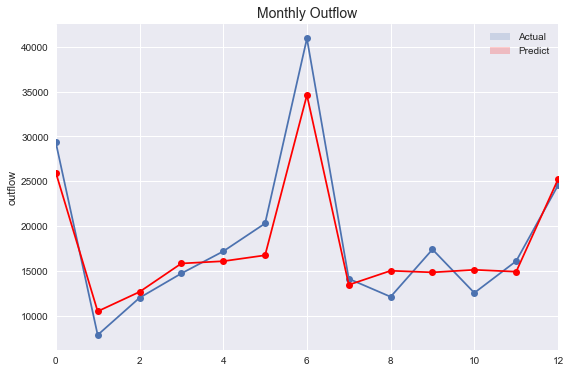

In [323]:
plt.subplots(nrows=1, ncols=1, figsize=(9,6))
sns.tsplot(y_test, marker="o")
sns.tsplot(nn_predict, marker="o", color='r')
plt.legend(['Actual', 'Predict'])
plt.title('Monthly Outflow', size=14)
plt.xlabel('')
plt.ylabel('outflow')
plt.show()

## ARIMAX vs FFNN

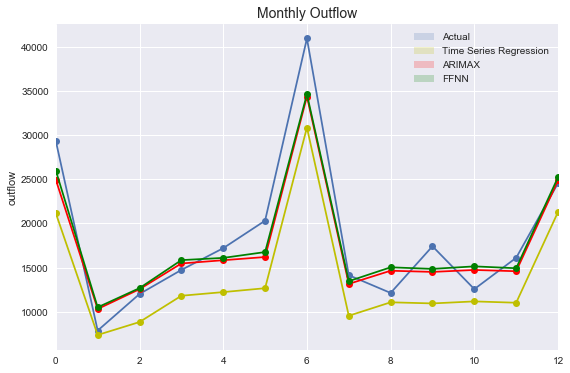

In [326]:
plt.subplots(nrows=1, ncols=1, figsize=(9,6))
sns.tsplot(y_test, marker="o")
sns.tsplot(y_predict, marker="o", color='y')
sns.tsplot(arimax_predict, marker="o", color='r')
sns.tsplot(nn_predict, marker="o", color='g')
plt.legend(['Actual', 'Time Series Regression', 'ARIMAX', 'FFNN'])
plt.title('Monthly Outflow', size=14)
plt.xlabel('')
plt.ylabel('outflow')
plt.show()